<a href="https://colab.research.google.com/github/riyaprakash7827-del/ML-practice/blob/main/Digits_Classification_by_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Classification

In [ ]:
# Handwritten Digits Classification
#

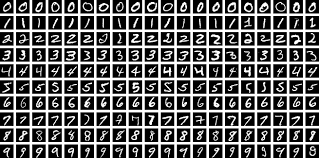

In [ ]:
# Image: Black and White
# 2:  Black, white
# Image Pixel(): array form: (0-255 range)
# 0: Black
# 1-244 : Gray
# 255: White
# Colored Image: 3 channel
# Red: R (0-255)
# Greeen: G(0-255)
# Blue: B(0-255)
# RGB channel

#RGB(50,100,200)

# Step 1: Load important Modules

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
print('Done')

Done


In [ ]:
# Let's create dummy image

# pixel: 0: black
# pixel: 255: white


data = np.arange(0,256)
data

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
data.shape

(256,)

In [ ]:
image_data = data.reshape((16,16))


In [ ]:
image_data.shape

(16, 16)

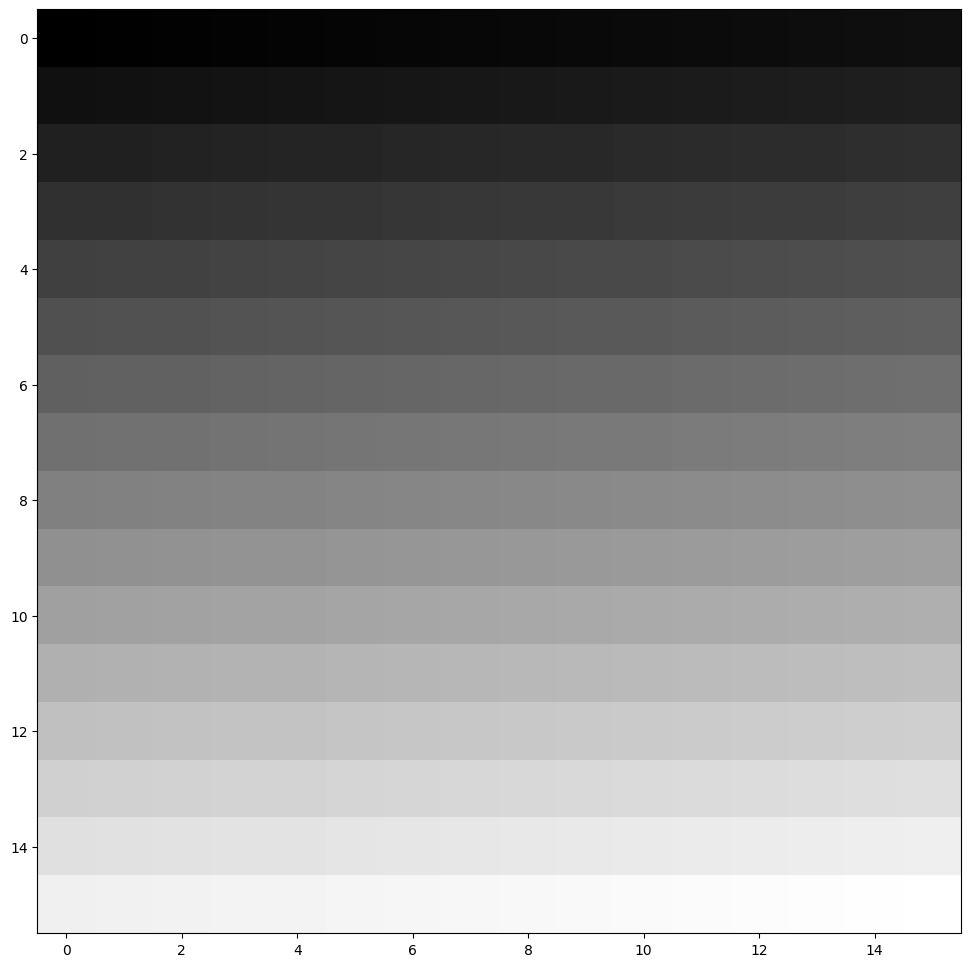

In [ ]:
plt.figure(figsize = (12,12))
plt.gray()
plt.imshow(image_data)
plt.show()

In [ ]:
# Every image stored in array format and each value represent their pixel value

In [ ]:

doremon_arr = plt.imread('/content/doremon.jpg')
final_arr = doremon_arr.copy()

array([[[247, 247, 249],
        [247, 247, 249],
        [247, 247, 249],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 250],
        [248, 248, 250],
        [248, 248, 250],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[250, 250, 252],
        [250, 250, 252],
        [249, 249, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[206, 204, 207],
        [204, 202, 205],
        [202, 200, 203],
        ...,
        [ 32,  32,  34],
        [ 13,  13,  15],
        [ 40,  40,  42]],

       [[203, 201, 204],
        [199, 197, 200],
        [197, 195, 198],
        ...,
        [ 55,  55,  57],
        [ 21,  21,  23],
        [ 25,  25,  27]],

       [[202, 200, 203],
        [196, 194, 197],
        [193, 191, 194],
        ...,
        [ 85,  85,  87],
        [ 37,  37,  39],
        [ 27,  27,  29]]], dtype=uint8)
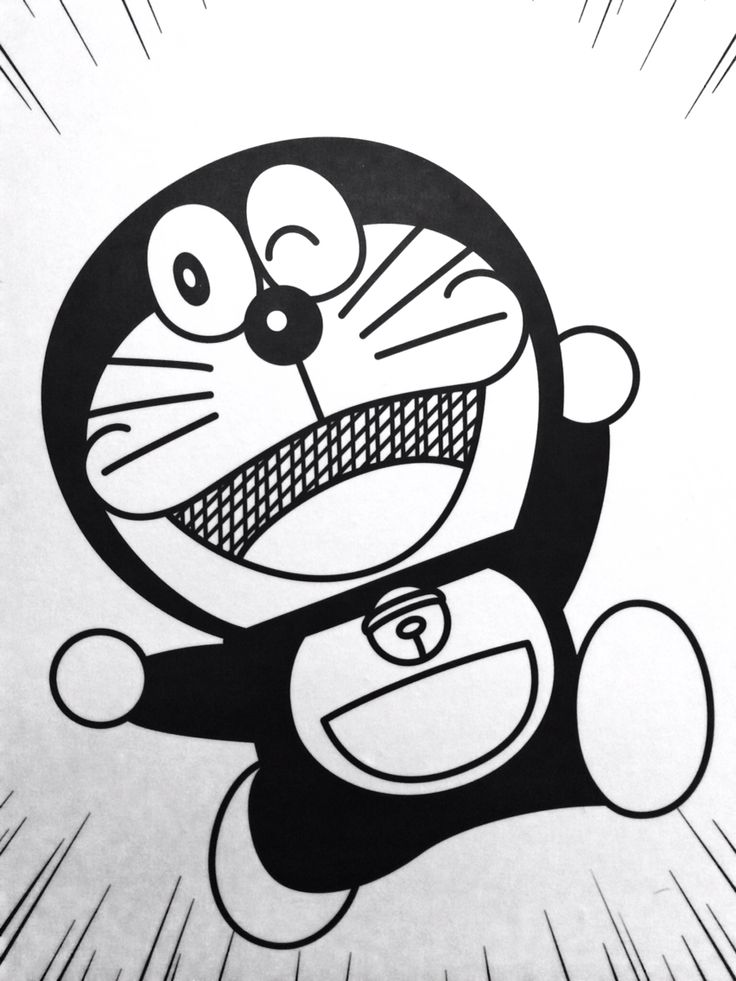

In [ ]:
final_arr

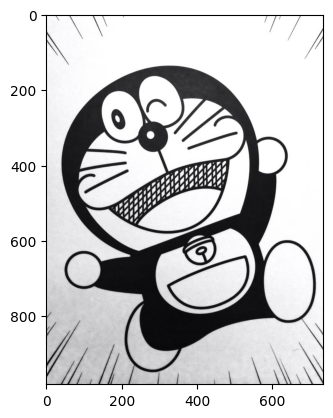

In [ ]:
plt.imshow(final_arr)

In [ ]:
final_arr.shape

(981, 736, 3)

array([[[251, 251, 253],
        [252, 252, 254],
        [252, 252, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[251, 251, 253],
        [251, 251, 253],
        [251, 251, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[251, 251, 253],
        [249, 249, 251],
        [249, 249, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[226, 226, 228],
        [226, 226, 228],
        [226, 226, 228],
        ...,
        [250, 250, 252],
        [251, 251, 253],
        [252, 252, 254]],

       [[226, 226, 228],
        [227, 227, 229],
        [228, 228, 230],
        ...,
        [250, 250, 252],
        [251, 251, 253],
        [251, 251, 253]],

       [[226, 226, 228],
        [228, 228, 230],
        [229, 229, 231],
        ...,
        [250, 250, 252],
        [250, 250, 252],
        [251, 251, 253]]], dtype=uint8)
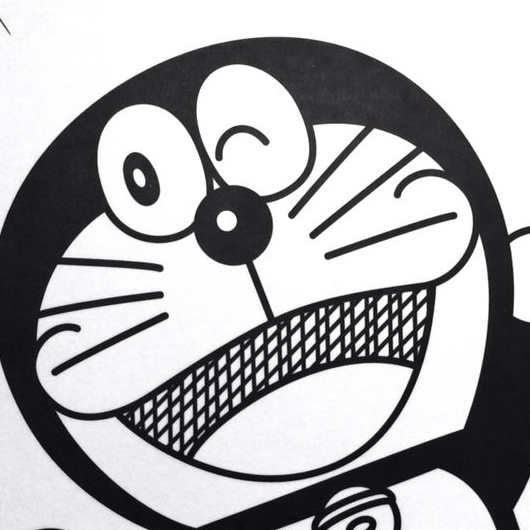

In [ ]:
final_arr[100:630,50:580]

# Step 2: Load Dataset

In [ ]:
data = load_digits()

In [ ]:
print(data['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [ ]:
# 0,1,2,3,4,5,6,7,8,9 = total : 10
# Multiclass classification

digits_df = pd.DataFrame(data['data'],columns=data['feature_names'])

In [ ]:
digits_df['target'] = data['target']


In [ ]:
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


# Step 3:EDA

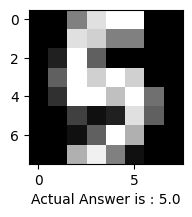

In [ ]:
temp_data = digits_df.sample().values.ravel()
ans = temp_data[-1]
features = temp_data[:-1]

# features.shape

digit_arr = features.reshape((8,8))
plt.figure(figsize = (2,2))
plt.imshow(digit_arr)
plt.xlabel(f'Actual Answer is : {ans}')
plt.show()

# Step 4: Model Building

In [ ]:
X = digits_df.iloc[:,:-1]
y = digits_df.iloc[:,-1]
X.shape, y.shape

((1797, 64), (1797,))

In [ ]:
# train_test_split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape

(1437, 64)

In [ ]:
X_test.shape

(360, 64)

In [ ]:
model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# model test score

model.score(X_test,y_test)

0.9694444444444444

In [ ]:
# model training score

model.score(X_train,y_train)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 44,  0,  1,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 44,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 33,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 29,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 38]])

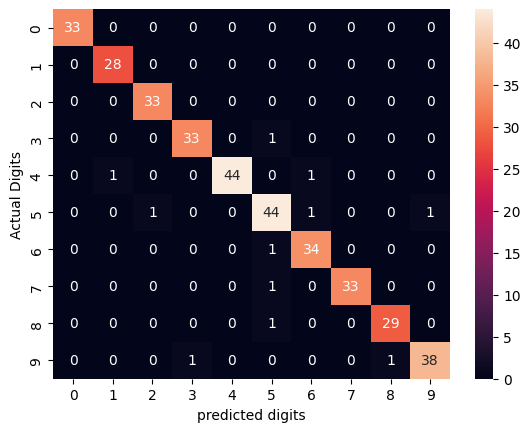

In [ ]:
sns.heatmap(cm, annot = True)
plt.xlabel('predicted digits')
plt.ylabel('Actual Digits')
plt.show()

In [ ]:
accuracy_score(y_test,y_pred)

0.9694444444444444

In [ ]:
precision_score(y_test,y_pred, average='weighted')

0.9699365066293734

In [ ]:
f1_score(y_test,y_pred, average='weighted')

0.9695153645323796

In [ ]:
recall_score(y_test,y_pred, average='weighted')

0.9694444444444444

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.96      0.98        46
           5       0.92      0.94      0.93        47
           6       0.94      0.97      0.96        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



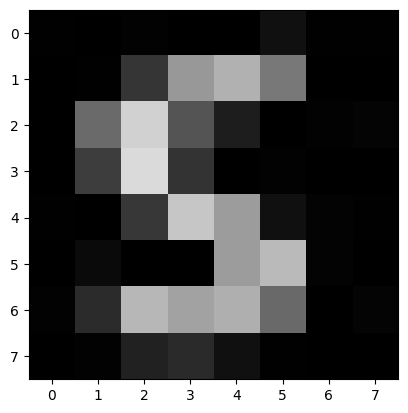

In [ ]:
test_image = plt.imread('/content/5_digit.jpg')
plt.imshow(test_image )

In [ ]:
test_image.shape

(8, 8, 3)

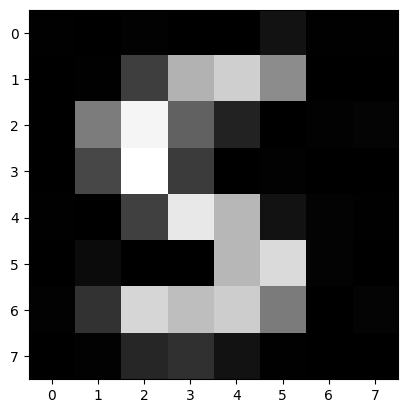

In [ ]:
final_test_data = test_image[:,:,0]

plt.imshow(final_test_data)

In [ ]:
final_data = np.expand_dims(final_test_data.ravel(),axis = 0)

In [ ]:
final_data.shape

(1, 64)

In [ ]:
model.predict(final_data)

array([4])

In [ ]:
np.max(model.predict_proba(final_data))*100

np.float64(99.99999999999656)

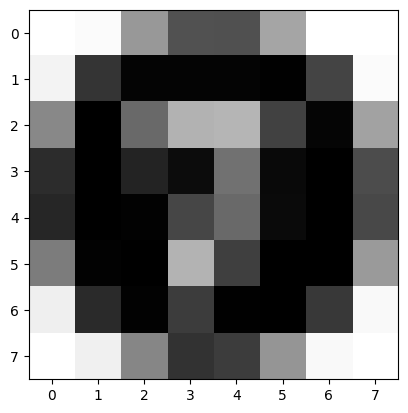

In [ ]:
plt.imshow(final_test_data)